In [1]:
import random
from scipy.stats import norm
import pandas
from datetime import datetime
print("Обновлено:", datetime.now().isoformat())

Обновлено: 2022-03-22T19:02:08.162412


In [2]:
def gen_values(a, b, n):
    return [random.uniform(a, b) for _ in range(n)]

def get_mean(vals):
    n = len(vals)
    mx_rasch = sum(vals)/n
    return mx_rasch

def get_dov_interval(vals, mean):
    n = len(vals)
    dx_rasch = sum(list(map(lambda x: x**2, vals)))/n - mean**2
    sigma_rasch = dx_rasch**0.5
    t = 1.96
    delt = (t*sigma_rasch)/(n**0.5)
    return delt

In [6]:
def CI_U(a, b, n, m):
    gamma = 0.95
    vals = [
        gen_values(a,b,n) for _ in range(m)
    ]
    means = [get_mean(val) for val in vals]
    mean = get_mean(means)
    dxs = sorted([abs(mean - meani) for meani in means])
    tmean = b - a
    delt = ((tmean/ (2*(3**0.5)))*norm.ppf(gamma, 0, 1))/(n**0.5)
    return [mean, dxs[round(gamma*m) - 1], delt]
m = 100
df = pandas.DataFrame( 
    [[n]+ CI_U(0, 1, n, m) for n in range(1, 10)]
    +
    [
        [n]+ CI_U(0, 1, n, m) for n in [10, 20, 30, 100, 1000]
    ],
    columns=["n", "Среднее мат ожиданий", "95% отклонение факт.", "95% отклонение расч."]
)
df.set_index("n", inplace=True)
display(df)

,Среднее мат ожиданий,95% отклонение факт.,95% отклонение расч.
n,,,
1,0.441431,0.454769,0.474828
2,0.521849,0.378602,0.335754
3,0.509181,0.296945,0.274142
4,0.487491,0.262301,0.237414
5,0.518330,0.233335,0.212350
6,0.492600,0.230894,0.193848
7,0.506666,0.194224,0.179468
8,0.508562,0.201478,0.167877
9,0.487146,0.177668,0.158276


In [3]:
import math
def CI_U_G(a, b, n, m):
    vals = [
        gen_values(a,b,n) for _ in range(m)
    ]
    means = [get_mean(val) for val in vals]
    xmin, xmax = min(means), max(means)
    r = round(1 + 3.3*math.log10(m))
    delta = (xmax - xmin)/r
    start = xmin
    stop = start + delta
    ranges = [start]
    yi = [0 for _ in range(r)]
    for i in range(r):
        for x in means:
            if start <= x and (x < stop or i == r - 1):
                yi[i] += 1
        if i == r - 1:
            ranges.append(xmax)
        else:
            ranges.append(stop)
        start = stop
        stop += delta
    xi = ranges
    wi = [yi[i]/m for i in range(r)]
    hi = [(wi[i]/delta) for i in range(r)]
    return [delta, xi, hi]

10 10 0.0
10 100 0.0
10 1000 0.004985809326171875
10 10000 0.0458827018737793
10 100000 0.5460903644561768
10 1000000 5.83679986000061
100 10 0.0
100 100 0.003989219665527344
100 1000 0.029922008514404297
100 10000 0.3271365165710449
100 100000 3.3041653633117676
100 1000000 36.76679539680481
1000 10 0.00298309326171875
1000 100 0.028925418853759766
1000 1000 0.29219746589660645
1000 10000 3.1007418632507324
1000 100000 31.59152603149414
10000 10 0.02989482879638672
10000 100 0.2872323989868164
10000 1000 3.03888201713562
10000 10000 30.776660442352295
100000 10 0.292219877243042
100000 100 3.068793773651123
100000 1000 33.595338582992554
1000000 10 3.424842357635498
1000000 100 30.700148582458496
Выводим полученную гистограмму


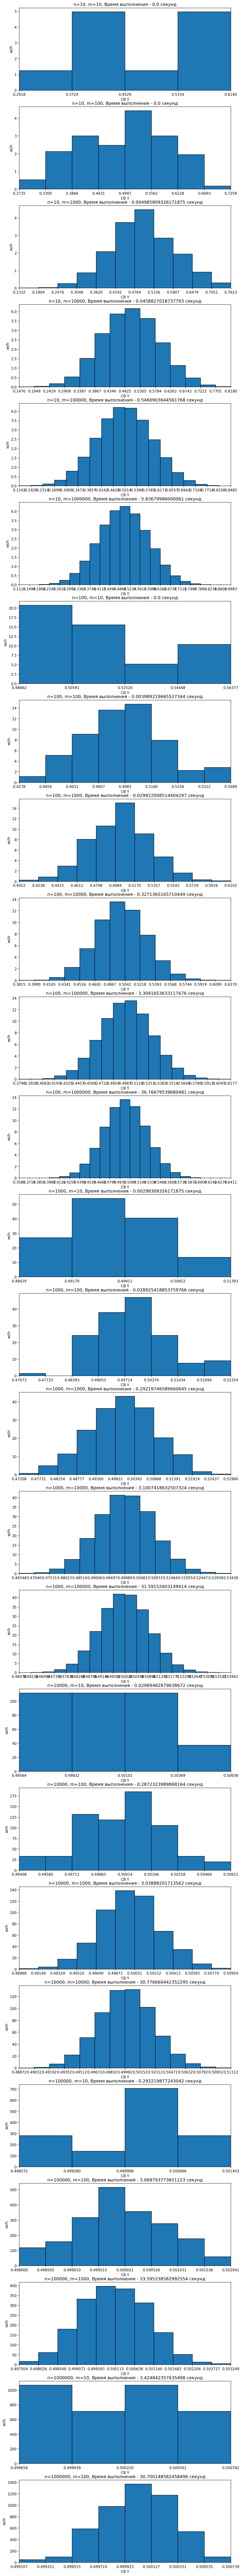

In [4]:
import matplotlib.pyplot as plt
import time
ns = [10**i for i in range(1, 7)]
ms = [10**i for i in range(1, 7)]

graphs = []
for n in ns:
    for m in ms:
        start = time.time()
        t = CI_U_G(0, 1, n, m)
        time_waited = time.time() - start
        graphs.append(
            [n, m, time_waited] + t
        )
        print(n, m, time_waited)
        if time_waited > 6:
            break
ln_ns = len(graphs)
fig, axs = plt.subplots(ln_ns)
fig.set_dpi(150)
fig.set_size_inches(10.5, 5*ln_ns, forward=True)
for graph, ax, in zip(graphs, axs):
    n, m, time_waited, delta, xi, hi = graph
    xmin = min(xi)
    xmax = max(xi)
    R = xmax - xmin
    ax.bar(list(map(lambda x: (xi[x]+xi[x+1])/2, range(len(xi)-1))), hi, delta, edgecolor="black")
    ax.set_xlim(min(xi), max(xi))
    ax.set_xlabel('СВ Y')
    ax.set_ylabel('wi/h')
    ax.set_title(f"n={n}, m={m}, Время выполнения - {time_waited} секунд")
    ax.set_xticks(xi)
#ax.set_yticks([0] + hi)
print("Выводим полученную гистограмму")